<h1 style="color:rgb(0,120,170)">Assignment 6: Logistic Regression</h1>

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt

The goal of this exercise is to implement logistic regression from scratch using only numpy. Start with the following tasks:

* Implement the formula for the gradient computed in the lecture. In particular you should implement a function 
`logistic_gradient(w, x, y)` that takes a parameter vector
$\mathbf{w}$, a data matrix $\mathbf{X}$ and a label vector
$\mathbf{y}$ and returns the gradient $\frac{\partial L}{\partial
\mathbf{w}}$, where $L$ is the negative log-likelihood for the Bernoulli distribution, i.e. the cross-entropy loss.

* Implemt a function `cost(w, x, y)`, that takes the same parameters but returns the cross-entropy loss.

* Test whether the gradient calculated by `logistic_gradient(w, x, y)` is correct via Gradient Checking. To do so, implement
a function `numerical_gradient(w, x, y)` that takes the same parameters
as `logistic_gradient`, but calculates the gradient numerically via the central difference quotient, using $\epsilon = 10^{-4}$ as suggested in the lecture slides.

* Generate a random data matrix consisting of 5 data points with 10 features drawn from a standard normal distribution as well as corresponding random binary labels and a random weight vector, whose entries again stem from the standard normal distribution. Use them as input of both functions and compare the outputs. Hint: to generate the distributions use `np.random.normal` and `np.random.randint`.


<h3 style="color:rgb(210,90,80)">Code (30 points):</h3>

In [2]:
#Complete the functions with your code

def logistic_gradient(w, x, y):

    derivated_L = 0
    
    for yi,xi in zip(y, x):
        individual_model = 1/(1 + np.exp(-np.matmul(w, xi))) # get out a number
        
        first_dL = (individual_model - yi) * xi

        derivated_L += first_dL
    
    return derivated_L
    
def cost(w, x, y): # returns the Cross entropy Loss
    
    wt = w.reshape(1, w.shape[0]) #np.transpose(w)
    sub_total = 0
    for yi,xi in zip(y, x):
        individual_model = 1/(1 + np.exp(-np.matmul(wt, xi)))
        single_L = yi*np.log(individual_model) + (1-yi)*np.log(1-individual_model) # loss for single xi
        sub_total += single_L
        
    return (- sub_total) # loss
    
def numerical_gradient(ww, x, y):


    unit_vector = np.zeros(x.shape[1]) # number of entries as many as there exist y_is
    ep = 10**(-4)
    liste = []
    for index_w, wi in enumerate(ww):
        sub_total1 = 0
        sub_total2 = 0
        unit_vector[index_w] = 1 * ep
        summer1 = 0
        summer2 = 0
        for yi,xi in zip(y, x):
            individual_model1 = 1/(1 + np.exp(-np.matmul((ww + unit_vector), xi))) # get out a number
            individual_model2 = 1/(1 + np.exp(-np.matmul((ww - unit_vector), xi))) # get out a number
            single_L1 = yi*np.log(individual_model1) + (1-yi)*np.log(1-individual_model1)
            single_L2 = yi*np.log(individual_model2) + (1-yi)*np.log(1-individual_model2)
            summer1 += single_L1
            summer2 += single_L2
        total_loss_wi_1 = - summer1
        total_loss_wi_2 = - summer2
        
        gradient_wi = (total_loss_wi_1 - total_loss_wi_2) / (2 * ep)
        liste.append(gradient_wi)
        
        unit_vector[index_w] = 0
    
   
    return np.array(liste)


In [3]:
#your code for data creation
np.random.seed(1)
X = np.random.normal(size=(5,10)) # 5 samples with 10 features each
y = np.random.randint(0,2, size=5) # 2 is excluded # size 5 because we have 5 samples

ww = np.random.normal(size=(10)) # w has to have this shape because the unit_vector is later added to it # 10 
# different features can get different weights

result_log_gradient = logistic_gradient(ww,X,y)
numerical_gradient_result = numerical_gradient(ww,X,y)
cost = cost(ww,X,y)
close = np.allclose(result_log_gradient,numerical_gradient_result)

print(f"""logistic gradient 
{result_log_gradient} 
vs.
numerical gradient
{numerical_gradient_result}

Are they close enough?
{close}

""")
print(f"The cost is {float(cost)}") 


logistic gradient 
[-1.98872926  1.29693677  0.71656747  2.48974895  0.51748953 -0.18441261
 -0.17581644  1.16969363 -0.67749914  0.75321757] 
vs.
numerical gradient
[-1.98872926  1.29693677  0.71656747  2.48974895  0.51748953 -0.18441261
 -0.17581644  1.16969363 -0.67749914  0.75321757]

Are they close enough?
True


The cost is 8.42219567940343


Next we intend to apply logistic regression on a real data set.

* Implement a function `fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=1e5)` that uses Logistic Regression with Gradient Descent to train classifiers on the training set. Use randomly initialized weights, drawn from a uniform distribution between $-1$ and $1$, a learning rate $\eta$ (eta) of $10^{-4}$ and a maximum number of iterations of $1e5$. Furthermore the algorithm should stop if the difference between the loss of the last iteration step and the current loss is less than $\eta$. Also print the losses in $1000$ step intevals. The function should return the model weights?????????????.
* Furthermore, implement a function `predictLogReg(w, x)` that returns the prediction for the given parameter vector $\mathbf{w}$ and feature vector $\mathbf{x}$.

Hint: for intialization use `np.random.uniform`.

<h3 style="color:rgb(208,90,80)">Code (30 points)</h3>


In [4]:
#Complete the functions with your code

def fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=100000):
    
    weights = np.random.uniform(low=-1.0, high=1.0, size=(len(x_train[0])))
    for iteration in range(max_iter):
        loss_function_adder = 0
        derivated_L = 0
        old_loss = 0
        for yi,xi in zip(y_train, x_train):
            individual_model3 = 1/(1 + np.exp(-np.matmul(weights, xi))) # get out a number

            loss_function_part = yi*np.log(individual_model3) + (1-yi)*np.log(1-individual_model3)
            loss_function_adder += loss_function_part

            first_dL = (individual_model3 - yi) * xi

            derivated_L += first_dL

        total_loss_value = - loss_function_adder
        total_derivation_matrix = derivated_L

        if iteration % 1000 == 0:
            print(f'{iteration}. iteration: Current loss is {total_loss_value}')
        
        if abs(old_loss - total_loss_value) < eta:
            break
            
        weights = weights - eta * total_derivation_matrix
        
        old_loss = total_loss_value
    
    
    return weights

def predictLogReg(w, x):
    
    return 1/(1 + np.exp(-np.matmul(w, x))) # model value as prediction


In the following cell the data set `DataSet_LR_a.csv` is loaded and split into a training set and a test set ($50\,\%$ each). Now you should:
* Fit the logistic regression model from above to the training data and print the parameters for the test data.
* Now we classify samples as class `1` if the Logistic Regression returns values $\geq 0.5$ and `0` otherwise. Calculate Accuracy and Balanced Accuracy on the training and on the test sets.
* Provide ROC curves of the classifiers on the test samples and compute the corresponding AUC. Label the axes appropriately. Hint: the functions `roc_curve` and `auc` from `sklearn.metrics` might be useful.

<h3 style="color:rgb(208,90,80)">Code (35 points)</h3>


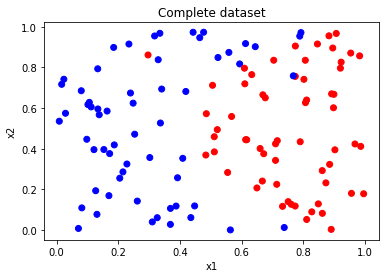

In [5]:
#nothing to do here

from sklearn.utils import shuffle
# Read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet_LR_a.csv', delimiter=',',skip_header=1)
X, y = Z[:,:-1], Z[:,-1]
X = np.hstack((np.ones((X.shape[0],1)),X))   #prepend ones for intercept
# Plot data distribution
color= ['red' if elem==1 else 'blue' for elem in y ]
plt.scatter(X[:,1], X[:,2], c=color)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Complete dataset')
# Split into test and training set
X_train=X[:np.int(X.shape[0]/2)]
X_test=X[np.int(X.shape[0]/2):]
y_train=y[:np.int(len(y)/2)]
y_test=y[np.int(len(y)/2):]

In [6]:
# Your code
# If you use variable names pred_train and pred_test for the corrsponding predictions on training and test sets, then you can use the plotting routine below
updated_weights = fitLogRegModel(X_train,y_train)
print(f'Updated weights/parameters: {updated_weights}')


0. iteration: Current loss is 38.83500316801331
1000. iteration: Current loss is 34.06273950743208
2000. iteration: Current loss is 31.930878896982332
3000. iteration: Current loss is 30.204904074562883
4000. iteration: Current loss is 28.778302832668803
5000. iteration: Current loss is 27.58649453316743
6000. iteration: Current loss is 26.580810714943127
7000. iteration: Current loss is 25.724249006890613
8000. iteration: Current loss is 24.98844050384167
9000. iteration: Current loss is 24.35142142761988
10000. iteration: Current loss is 23.79601033098995
11000. iteration: Current loss is 23.308627043500287
12000. iteration: Current loss is 22.878429388624046
13000. iteration: Current loss is 22.496677677069147
14000. iteration: Current loss is 22.156262837298314
15000. iteration: Current loss is 21.85135276678547
16000. iteration: Current loss is 21.577124737700323
17000. iteration: Current loss is 21.32956098100114
18000. iteration: Current loss is 21.105291075263235
19000. iterati

In [7]:
pred_train = []
for x in X_train:
    model_value = predictLogReg(updated_weights, x)
    if model_value >= 0.5:
        prediction = 1
    else: 
        prediction = 0
    pred_train.append(prediction)
    
pred_test = []
non_threshold_pred = []
for x in X_test:
    model_value = predictLogReg(updated_weights, x)
    if model_value >= 0.5:
        prediction = 1
    else: 
        prediction = 0
        
    pred_test.append(prediction)
    
    non_threshold_pred.append(model_value)
    

Text(0.5, 1.0, 'Test dataset - predictions')

<Figure size 432x288 with 0 Axes>

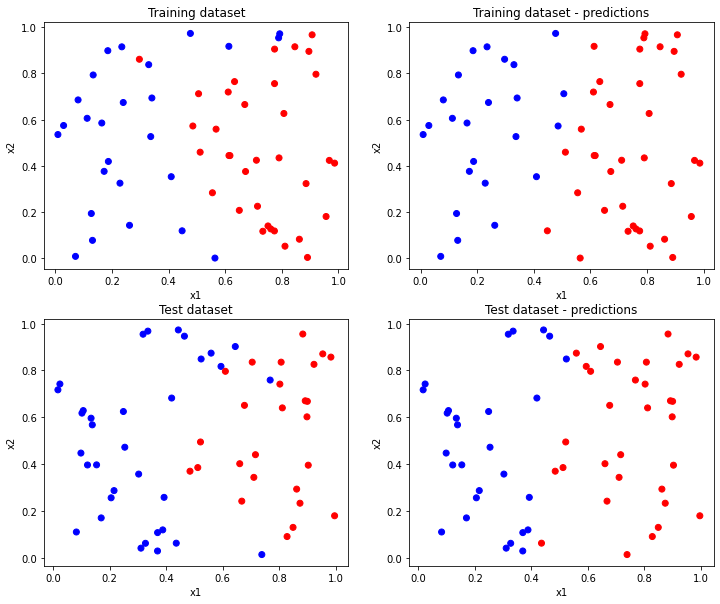

In [8]:
# Nothing to do here
# Plot training and test dataset
# Plot predictions for training and test dataset

fig = plt.figure()
fig = plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)
color= ['red' if elem>0.5 else 'blue' for elem in y_train ]
plt.scatter(X_train[:,1], X_train[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset')

plt.subplot(2, 2, 2)
color= ['red' if elem>0.5 else 'blue' for elem in pred_train ]
plt.scatter(X_train[:,1], X_train[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset - predictions')

plt.subplot(2, 2, 3)
color= ['red' if elem>0.5 else 'blue' for elem in y_test ]
plt.scatter(X_test[:,1], X_test[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset')

plt.subplot(2, 2, 4)
color= ['red' if elem>0.5 else 'blue' for elem in pred_test ]
plt.scatter(X_test[:,1], X_test[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset - predictions')

In [9]:
# Calculate accuracy and balanced accuracy for training set
# Your code
from sklearn.metrics import accuracy_score, balanced_accuracy_score
accuracy = accuracy_score(y_train, pred_train)
bal_ac = balanced_accuracy_score(y_train, pred_train)
print(f'''
For training set:
Accuracy: {accuracy}
Balanced accuracy: {bal_ac}
''')



For training set:
Accuracy: 0.8666666666666667
Balanced accuracy: 0.8597285067873304



In [10]:
# Calculate accuracy and balanced accuracy for test set
# Your code
accuracy = accuracy_score(y_test, pred_test)

bal_ac = balanced_accuracy_score(y_test, pred_test)
print(f'''
For test set:
Accuracy: {accuracy}
Balanced accuracy: {bal_ac}
''')



For test set:
Accuracy: 0.9
Balanced accuracy: 0.9117647058823529



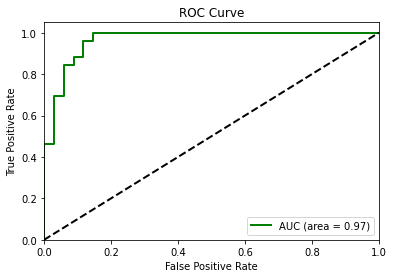

In [12]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


fpr, tpr, thresholds = roc_curve(y_test, non_threshold_pred)#, pos_label=2)
My_auc = roc_auc_score(y_test, non_threshold_pred)

plt.figure()

plt.plot(fpr, tpr, color='green',
         lw=2, label='AUC (area = %0.2f)' % My_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
